# DNA Sequencing with Machine Learning

## Introduction

DNA is a polymer made of two polynucleotide chains that codify genetic instructions for the development and functioning of organisms and viruses. Each chain consists of nucleotides, which are composed of a nitrogenous base (cytosine C, guanine G, adenine A, or thymine T), a sugar (deoxyribose), and a phosphate group. The chains form a sugar-phosphate backbone, and their bases pair together through hydrogen bonds, following specific rules (A with T, C with G).

![title](img/dna.png)

Due to the vast complexity of DNA sequences, interpreting them requires advanced tools. Machine learning (ML), a subfield of Artificial Intelligence, plays a key role in analyzing large DNA datasets, recognizing patterns, and making predictions.

In this project, we will use ML techniques to analyze DNA, identify patterns, and gain insights that could help detect genetic diseases or understand biological processes.

## How does Machine Learning work in Biology?

Imagine having a large amount of DNA sequences, each of which could tell you something, like whether a person has a certain disease or not. Analyzing these sequences by hand would be like looking for a needle in a haystack!

Machine learning, especially supervised learning, can help solve this problem. Supervised learning is a type of ML where a model is trained using labeled data. Each example in the dataset has both:

1. Input data: the DNA sequence, often represented in a format like strings or numerical patterns.

2. Label: the category or class it belongs to, such as a specific gene family or whether it’s linked to a particular disease.

The process involves:
1. Training the artificial intelligence model: the model learns the relationship between the input data (DNA sequences) and the labels (categories). For instance, it learns to associate patterns in the sequence with specific gene families. This kind of artificial intelligence model is called classifier.

2. Making predictions

## Project Goals

In this project, we want to:
- Analyze DNA data to discover interesting patterns.
- Use machine learning to classify DNA sequences.

## Analyzing the data set

To begin analyzing human DNA, we need to load the human dna dataset. This dataset contains sequences of DNA alongside their corresponding gene family classifications. Understanding the distribution of these classes is an important first step in our analysis.

![title](img/classes.png)


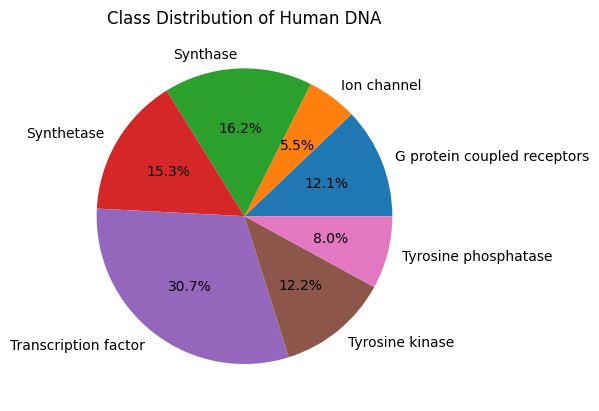

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file di dati
human_dna = pd.read_table('../data/raw/human.txt')

# Crea un dizionario per mappare le classi numeriche alle descrizioni
class_mapping = {
    0: 'G protein coupled receptors',
    1: 'Tyrosine kinase',
    2: 'Tyrosine phosphatase',
    3: 'Synthetase',
    4: 'Synthase',
    5: 'Ion channel',
    6: 'Transcription factor'
}

# Mappa le classi numeriche alle descrizioni nella colonna 'class'
human_dna['class'] = human_dna['class'].map(class_mapping)

# Conta i valori per ciascuna classe
class_counts = human_dna['class'].value_counts()

# Disegna il diagramma a torta
class_counts.sort_index().plot.pie(
    autopct='%1.1f%%',  # Percentuale visualizzata
    ylabel='',          # Rimuove l'etichetta dell'asse Y
)

plt.title("Class Distribution of Human DNA")  # Titolo del grafico
plt.show()

## Extracting Features from Base Pair Sequences  

Machine learning models work with numbers, but DNA sequences are made up of nitrogenous bases (A, T, C, G). To apply machine learning, we need to convert these sequences into a numerical format. One effective method for this is **$k$-mer counting**.

### What is $k$-mer Counting?  

DNA and protein sequences are often referred to as the "language of life." In this analogy:  
- The genome is like a book.  
- Genes and gene families are like sentences and chapters.  
- $k$-mers (short subsequences) are like words.  
- Nucleotide bases (A, T, C, G) and amino acids are the alphabet.  

Because of this similarity, methods from **Natural Language Processing (NLP)** — used to analyze human languages — can also be applied to analyze DNA and protein sequences.

### How $k$-mer Counting Works  

The process is simple and intuitive:  
1. Take a long DNA sequence and break it into overlapping “words” of length $k$.  
2. Each “word” is a subsequence of $k$ nucleotide bases.  

**Example:**  
For a sequence `ATGCATGCA` and $k=6$ (hexamers), the sequence is broken into:  
1. `ATGCAT`  
2. `TGCATG`  
3. `GCATGC`  
4. `CATGCA`  

This process generates overlapping subsequences, which are called **$k$-mers**.  

### Why Use $k$-mers?  

In genomics, this process helps break down complex sequences into manageable pieces. By counting the occurrence of each $k$-mer in the DNA, we create a numerical representation of the sequence. This representation can then be used as input for machine learning models to identify patterns, classify sequences, or predict biological functions.  

In [2]:
import pandas as pd

# Carica il file di dati
human_dna = pd.read_table('../data/raw/human.txt')

# Crea un dizionario per mappare le classi numeriche alle descrizioni
class_mapping = {
    0: 'G protein coupled receptors',
    1: 'Tyrosine kinase',
    2: 'Tyrosine phosphatase',
    3: 'Synthetase',
    4: 'Synthase',
    5: 'Ion channel',
    6: 'Transcription factor'
}

# Mappa le classi numeriche alle descrizioni nella colonna 'Class'
human_dna['class'] = human_dna['class'].map(class_mapping)

# Mostra la tabella aggiornata
human_dna

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,Synthase
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,Synthase
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,Synthetase
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,Synthetase
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,Synthetase
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,G protein coupled receptors
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,Transcription factor
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,Transcription factor
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,Transcription factor


In [3]:
import pandas as pd

def get_kmers(sequence, k):
    if len(sequence) < k:
        pass
        # raise ValueError("La lunghezza della sequenza deve essere maggiore o uguale a k")    
    kmers = []
    for i in range(len(sequence) - k + 1):
        kmers.append(sequence[i:i + k])
    return kmers

def join_kmers(kmers):
    return ' '.join(kmers)

# Estrai i k-mers per ogni sequenza
k = 6
human_dna['k-mers'] = human_dna.apply(lambda x: get_kmers(x['sequence'], k), axis=1)

# Unisci i k-mers in una singola stringa per ogni riga
human_dna['k-mers'] = human_dna['k-mers'].apply(join_kmers)

# Riordina le colonne per avere 'joined-kmers' come prima e 'class' come seconda
human_dna = human_dna[['k-mers', 'class']]

# Stampa il DataFrame risultante
human_dna

,k-mers,class
0,ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...,Synthase
1,ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...,Synthase
2,ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...,Synthetase
3,ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...,Synthetase
4,ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...,Synthetase
...,...,...
4375,ATGGAA TGGAAG GGAAGA GAAGAT AAGATT AGATTT GATT...,G protein coupled receptors
4376,ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...,Transcription factor
4377,ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...,Transcription factor
4378,ATGGGG TGGGGC GGGGCA GGGCAC GGCACC GCACCT CACC...,Transcription factor


### Using Bag of Words (BoW) for DNA Sequencing

The **Bag of Words (BoW)** model is a simple and effective technique used in NLP to represent text data. In the context of **DNA sequencing**, BoW can be adapted to represent DNA sequences as a collection of fixed-length subsequences (also known as **k-mers**) rather than words.

#### How BoW Works for DNA Sequencing

1. **DNA Sequences as Text**: DNA sequences consist of four nucleotides represented by the letters A, T, C, and G. These letters can be treated as the "alphabet" of the DNA sequences.

2. **K-mers**: To apply BoW, we break down the DNA sequences into overlapping subsequences of length **k** (called **k-mers**).

3. **Vectorization**: In BoW, each sequence is represented by a vector where each dimension corresponds to the occurrence of a unique k-mer in the sequence. A **CountVectorizer** can be used to count the occurrences of each unique k-mer across all sequences in a dataset.

4. **Matrix Representation**: The result is a matrix where each row represents a DNA sequence and each column represents a k-mer. The value in each cell indicates how many times the corresponding k-mer appears in the sequence.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

frasi = ['Il cane mangia la mela', 'Il gatto mangia il tonno', 'Sto imparando biologia']

vectorizer = CountVectorizer(ngram_range=(1, 1))  # Per analizzare singole parole (unigrammi)
X = vectorizer.fit_transform(frasi)
feature_names = vectorizer.get_feature_names_out()
df = pd.DataFrame(X.toarray(), columns=feature_names)
print(df.to_string(index=False))

 biologia  cane  gatto  il  imparando  la  mangia  mela  sto  tonno
        0     1      0   1          0   1       1     1    0      0
        0     0      1   2          0   0       1     0    0      1
        1     0      0   0          1   0       0     0    1      0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

k_mers = human_dna['k-mers']
countVectorizer = CountVectorizer(ngram_range=(4,4))
x_train = countVectorizer.fit_transform(k_mers)
y_train = human_dna.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

classifier = MultinomialNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

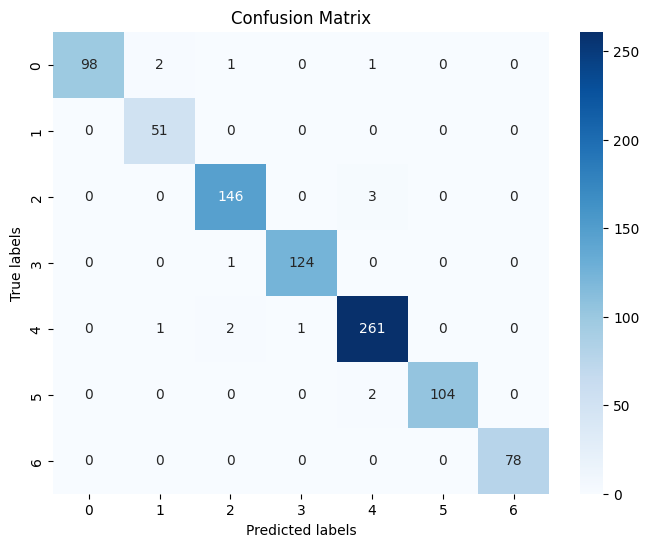

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolare la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Creare una heatmap per la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)

# Aggiungere etichette
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Mostrare la heatmap
plt.show()

Precision: 0.984
Recall: 0.984
Accuracy: 0.984
F1-score: 0.984


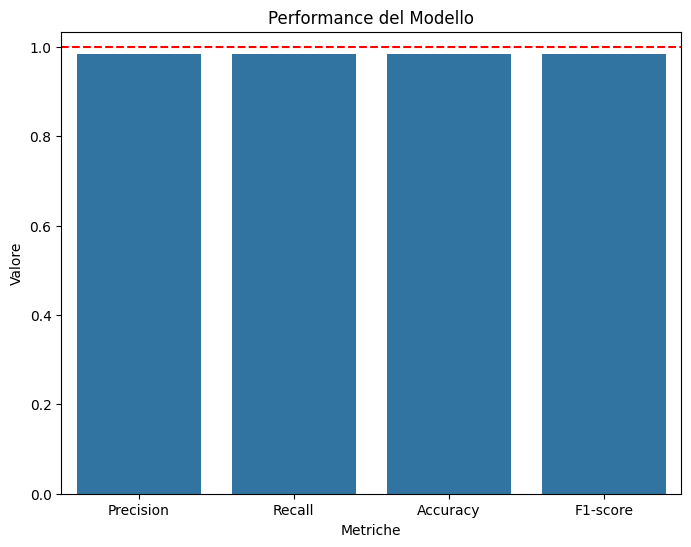

In [8]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted') 
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Stampare i risultati
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")

metrics = {'Precision': precision, 'Recall': recall, 'Accuracy': accuracy, 'F1-score': f1}

# Creare un grafico a barre
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))

# Aggiungere etichette e titolo
plt.xlabel('Metriche')
plt.ylabel('Valore')
plt.title('Performance del Modello')

# Tracciare una linea orizzontale tratteggiata al valore 1.0
plt.axhline(y=1.0, color='r', linestyle='--')

# Mostrare il grafico
plt.show()